In [1]:
from os import chdir
chdir('../')
%matplotlib inline
from lib import *

from time import time

pd.options.display.precision = 4
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Lato'
mpl.rcParams['font.weight'] = 700
sns.set(font='Lato', font_scale=1)
sns.set()
np.random.seed(42)
suppress_warnings()

In [2]:
from sklearn.feature_selection import f_classif
def find_p_val(feat, tar):   
    anova = f_classif(feat,np.ravel(tar))
    anova_df = pd.DataFrame([{'f_stat':f,'p_val':p} for f,p in zip(anova[0], anova[1])])
    anova_df.index = feat.columns
    return anova_df['p_val'] 


In [3]:
feature_anova_res = pd.read_pickle('/home/jovyan/work/DSI/projects/project_3/data/feature_anova_p_cal')
feature_pval_mean = pd.DataFrame(feature_anova_res.T.mean()).sort(0,ascending=False)
feature_pval_mean.rename(columns={0:'p_val'}, inplace=True)
feature_pval_mean.head()

,p_val
feat_1402,0.6055
feat_4990,0.5955
feat_0787,0.5944
feat_1425,0.5892
feat_2206,0.5890


In [5]:
std1= feature_pval_mean.mean() - feature_pval_mean.std()
std2= feature_pval_mean.mean() - 2*(feature_pval_mean.std())
print('Mean P_val:\t', round(feature_pval_mean.mean()[0],3),\
      '\tfeature_count_below_mean\t',\
      len(feature_pval_mean[feature_pval_mean['p_val']<feature_pval_mean.mean()[0]]))
print('-1 STD P_val:\t', round(std1[0],3),\
     '\tfeature_count_below_-1_std\t',\
      len(feature_pval_mean[feature_pval_mean['p_val']<std1[0]]))
print('-2 STD P_val:\t', round(std2[0],3),\
     '\tfeature_count_below_-2_std\t',\
      len(feature_pval_mean[feature_pval_mean['p_val']<std2[0]]))

Mean P_val:	 0.499 	feature_count_below_mean	 2450
-1 STD P_val:	 0.467 	feature_count_below_-1_std	 673
-2 STD P_val:	 0.436 	feature_count_below_-2_std	 113


In [5]:
round(feature_pval_mean.mean()[0],4)

0.499

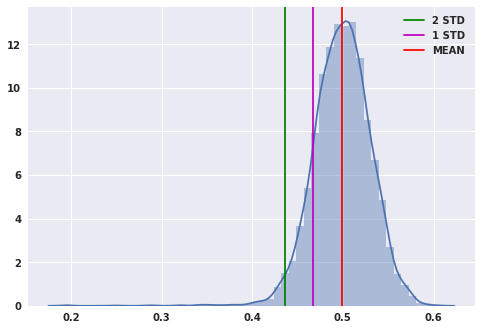

In [35]:
#import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.distplot(feature_pval_mean)
plt.axvline(x=std2[0], ymin=0, ymax=1, color = 'g', label= '2 STD')
plt.axvline(x=std1[0], ymin=0, ymax=1, color = 'm',label= '1 STD')
plt.axvline(x=feature_pval_mean.mean()[0], ymin=0, ymax=1, color = 'r', label='MEAN')
plt.legend()

In [19]:
good_col_top113_Anova_pval = pd.DataFrame(feature_anova_res.T.mean()).sort(0,ascending=True).head(113). \
        to_pickle('/home/jovyan/work/DSI/projects/project_3/data/good_col_top113_Anova_pval')

In [20]:
feature_worse_to_best = pd.DataFrame(feature_anova_res.T.mean()).sort(0,ascending=False).index
bad_col = list(feature_worse_to_best[:4000])
good_col = list(feature_worse_to_best[4000:])

In [25]:
X,y = make_DataFrame(n=1000,drop_cols = bad_col)
X_1,y_1 = make_DataFrame(n=1000,drop_cols = bad_col)
X_2,y_2 = make_DataFrame(n=1000,drop_cols = bad_col)
X_3,y_3 = make_DataFrame(n=1000,drop_cols = bad_col)
X_4,y_4 = make_DataFrame(n=1000,drop_cols = bad_col)
X_5,y_5 = make_DataFrame(n=1000,drop_cols = bad_col)
X_6,y_6 = make_DataFrame(n=1000,drop_cols = bad_col)
X_7,y_7 = make_DataFrame(n=1000,drop_cols = bad_col)
X_8,y_8 = make_DataFrame(n=1000,drop_cols = bad_col)
X_9,y_9 = make_DataFrame(n=1000,drop_cols = bad_col)
X_0,y_0 = make_DataFrame(n=1000,drop_cols = bad_col)

In [26]:
feature = pd.concat([X,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_0])
target = pd.concat([y,y_1,y_2,y_3,y_4,y_5,y_6,y_7,y_8,y_9,y_0])

In [27]:
feature.to_pickle('/home/jovyan/work/DSI/projects/project_3/data/feature')
target.to_pickle('/home/jovyan/work/DSI/projects/project_3/data/target')